In [1]:
import os
import fdtd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid = fdtd.Grid(shape=(260, 15.5e-6, 1), grid_spacing=77.5e-9)
# x boundaries
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
# y boundaries
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
simfolder = grid.save_simulation("Lenses")  # initializing environment to save simulation data
print(simfolder)

/home/du/code/ml_codes/fdtd/fdtd_output/fdtd_output_2024-3-23-22-38-39 (Lenses)


In [3]:
x, y = np.arange(-200, 200, 1), np.arange(190, 200, 1)
X, Y = np.meshgrid(x, y)
lens_mask = X ** 2 + Y ** 2 <= 40000
for j, col in enumerate(lens_mask.T):
    for i, val in enumerate(np.flip(col)):
        if val:
            grid[30 + i : 50 - i, j - 100 : j - 99, 0] = fdtd.Object(permittivity=1.5 ** 2, name=str(i) + "," + str(j))
            break

In [4]:
grid[15, 50:150, 0] = fdtd.LineSource(period=1550e-9 / (3e8), name="source")

In [5]:
grid[80:200, 80:120, 0] = fdtd.BlockDetector(name="detector")

In [ ]:
with open(os.path.join(simfolder, "grid.txt"), "w") as f:
    f.write(str(grid))
    wavelength = 3e8/grid.source.frequency
    wavelengthUnits = wavelength/grid.grid_spacing
    GD = np.array([grid.x, grid.y, grid.z])
    gridRange = [np.arange(x/grid.grid_spacing) for x in GD]
    objectRange = np.array([[gridRange[0][x.x], gridRange[1][x.y], gridRange[2][x.z]] for x in grid.objects], dtype=object).T
    f.write("\n\nGrid details (in wavelength scale):")
    f.write("\n\tGrid dimensions: ")
    f.write(str(GD/wavelength))
    f.write("\n\tSource dimensions: ")
    f.write(str(np.array([grid.source.x[-1] - grid.source.x[0] + 1, grid.source.y[-1] - grid.source.y[0] + 1, grid.source.z[-1] - grid.source.z[0] + 1])/wavelengthUnits))
    f.write("\n\tObject dimensions: ")
    f.write(str([(max(map(max, x)) - min(map(min, x)) + 1)/wavelengthUnits for x in objectRange]))

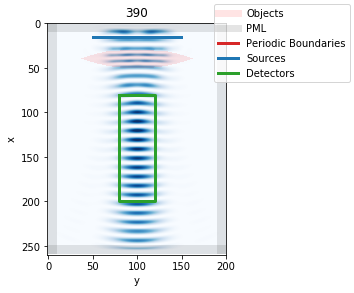

In [7]:
from IPython.display import clear_output # only necessary in jupyter notebooks
for i in range(400):
    grid.step()  # running simulation 1 timestep a time and animating
    if i % 10 == 0:
        # saving frames during visualization
        grid.visualize(z=0, animate=True, index=i, save=True, folder=simfolder)
        plt.title(f"{i:3.0f}")
        clear_output(wait=True) # only necessary in jupyter notebooks

grid.save_data()  # saving detector readings

100%|██████████| 121/121 [00:01<00:00, 87.25it/s]


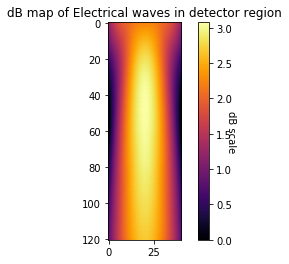

In [8]:
df = np.load(os.path.join(simfolder, "detector_readings.npz"))
fdtd.dB_map_2D(df["detector (E)"])

In [5]:
grid[30:230, 30:170, 0] = fdtd.BlockDetector(name="detector2")

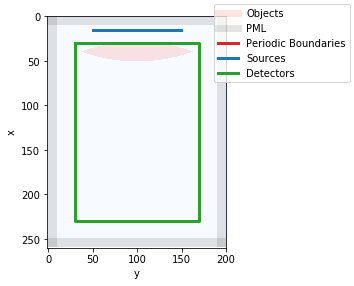

In [6]:
grid.visualize(z=0)

In [7]:
grid.run(400)

100%|██████████| 400/400 [01:14<00:00,  5.39it/s]


In [ ]:
df = np.load(os.path.join(simfolder, "detector_readings.npz"))
fdtd.dB_map_2D(df["detector2 (E)"])

In [12]:
grid.save_data()

In [11]:
print(simfolder)

/home/du/code/ml_codes/fdtd/fdtd_output/fdtd_output_2024-3-23-22-38-39 (Lenses)


In [14]:
df = np.load(os.path.join(simfolder, "detector_readings.npz"))

In [15]:
df

100%|██████████| 201/201 [00:08<00:00, 24.58it/s]


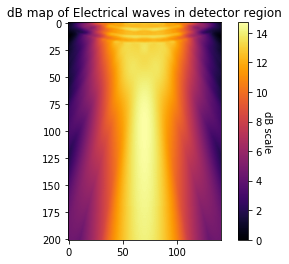

In [16]:
fdtd.dB_map_2D(df["detector2 (E)"])